# Aqui vamos a analizar el preprocesado de los datos

#### Comenzaremos presentando una serie de funciones auxiliares

* `word`:  toma un string y realiza un procesamiento de ese string dividiendolo e insertando sus partes en una lista.

* `date`:  toma la fecha y devuelve un diccionario que contiene el instante de observación junto con los satélites activos en ese momento.

* `all_information2`:  le das el nombre de un archivo Rinex que se encuentre en la misma carpeta donde se encuentre el script o añades la ruta de donde quieres que tome el archivo Rinex y te devuelve el diccionario comentado en el capítulo 2 del trabajo de fin de grado.

__Observacion__ : hemos añadido los tipos de los inputs y outputs de estas funciones de python con el fin de que su entendimiento sea más sencillo, aunque esto no sea necesario en python


In [7]:
def words(s: str) -> list:  
    lista = []
    aux = ""
    indicador = 0
    for i in range(len(s)):
        if s[i] =="\n":
            lista.append(aux)
        
        elif (s[i] != " "):
            aux += s[i]
            indicador = 0
        else:
            if (aux != "" or indicador>17): #Es un caso especial que sucede en los archivos Rinex
                lista.append(aux)
                indicador = 0
            aux = ""
            indicador += 1
            
    return lista 

def date(a : str) -> dict: #Coloca la fecha e instante de observación junto con los satélites activos en ese momento
    D = {}
    aux = ""
    for i in range(len(a)):
        try:
            if(a[i] != int(a[i]) ):
                aux += a[i]

        except ValueError:
            D[aux] = []
            break

    aux = ""

    i =2
    while (i<len(a)):
        try:
            if(a[i] != int(a[i]) ):
                aux += a[i]
                i+=1
        except ValueError:
            if(len(aux))<1:
                aux+= a[i]
            if(len(aux)>1):
                D[aux] = []
                aux = ""
            else:
                i+=1
                aux += a[i]
                i+=1
    
    D[aux] = []
    return D



def all_information2(filename : str) -> dict:
    f  = open(filename, 'r')
    lines = f.readlines()
    inicio = lines.index('                                                            END OF HEADER\n')
    lines = lines[inicio+1:] # El inicio contiene información que no es necesaria y no la tenemos en cuenta
    lista = []
    indice_lista = 0

    for i in range(len(lines)):
        
        if (len((lines[i]))<20 and len(words(lines[i-1])) == 8):
            lista.append(words(lines[i]))
            
        elif (len(words(lines[i]))) == 2 and('G' in words(lines[i])[len(words(lines[i]))-1] ):
            lista[len(lista)-1][7]+=(words(lines[i])[1])
        
        elif (len(lines[i]) <20 and len(lines[i-1])>40) or lines[i]=='\n' :
            pass
           
        else:
            lista.append(words(lines[i]))
            
            indice_lista +=1
    
    k = 1
    SD = {}
    r = 0
    for i in (lista):  
         if(len(i)==8 ):

            D = date(i[len(i)-1])
            for j in (list(D.keys())):
                
                D[j] = lista[r]
                
                r+=1
            
            SD[str(k)] = D
            k+=1
    return (SD)


Vamos a mostrar un ejemplo de la función principal

In [8]:
filename = "datos/GRA1065Q00.23O"
D = all_information2(filename)

print("\nLa información asociada a la i-ésima observación es D[i], veamos el caso para i = 25\n\n", D['25'])
print("\nLa información total del archivo es:\n\n","Escribir D (no lo haremos aquí con el fin de ahorrar espacio)")


La información asociada a la i-ésima observación es D[i], veamos el caso para i = 25

 {'9': ['23', '3', '6', '16', '0', '24.0000000', '0', '9G02G08G10G16G18G23G26G27G31'], '02': ['25241301.160', '25241308.620', '', '132644153.3520', '103359236.2400'], 'G08': ['24194506.920', '24194524.820', '24194525.440', '127143063.5990', '99072614.1450'], 'G10': ['23783000.340', '23783039.520', '', '124980870.4210', '97387816.3960'], 'G16': ['20873532.520', '20873537.200', '', '109691294.7820', '85473829.7790'], 'G18': ['21344719.180', '21344725.100', '21344729.160', '112167711.9560', '87403618.5370'], 'G23': ['22720656.760', '22720667.820', '22720672.160', '119398480.7950', '93037844.4760'], 'G26': ['20277612.760', '20277620.840', '20277619.500', '106559730.2120', '83033674.1290'], 'G27': ['21484764.640', '21484773.340', '21484773.780', '112903494.3130', '87976881.3590'], 'G31': ['23922893.040', '23922917.740', '', '125715346.8200', '97959949.9080']}

La información total del archivo es:

 Escrib

#### Ahora vamos a mostrar funciones más específicas para un archivo de tipo RINEX 2.11
* `unafrecuencia` toma el nombre del archivo rinex, un número de 0 a 5 y un satélite, donde:
    - 0 -> C1
    - 1 -> P2
    - 2 -> P5
    - 3 -> L1
    - 4 -> L2
    - 5 -> L5
    la función devuelve toda la información sobre ese satélite contenida en el archivo.
        
    
* `C1`, `P2`, `L1`, `L2` son una simplificación de `unafrecuencia` y que utilizaremos para facilitar el entendimiento a la hora de trabajar con distintas frecuencias.

In [10]:
def unafrecuencia(filename : str , numero : int,sat : str) -> dict: # Me devuelve la información acerca de una frecuencia
    datos = all_information2(filename)
    frec  = {} 
    for i in range(1,3601,1) :
        if str(i) in datos.keys() and sat in datos[str(i)] and len(datos[str(i)][sat])>4:
           
            frec[int(str(i))] = float(datos[str(i)][sat][numero])
            
    return frec

def C1(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,0,sat)

def P2(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,1,sat)

def L1(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,3,sat)

def L2(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,4,sat) 

#La clave hace referencia al número de observación y el contenido a la información del satélite en ese instante
print(f"Ejemplo datos L1 contenidos en {filename} sobre el satélite G01\n\n",L1(filename,'G10'))

Ejemplo datos L1 contenidos en datos/GRA1065Q00.23O sobre el satélite G01

 {1: 125053157.919, 2: 125050144.474, 3: 125047131.234, 4: 125044118.273, 5: 125041105.459, 6: 125038092.802, 7: 125035080.448, 8: 125032068.293, 9: 125029056.156, 10: 125026044.17, 11: 125023032.296, 12: 125020020.42, 13: 125017008.57, 14: 125013996.623, 15: 125010984.617, 16: 125007972.857, 17: 125004961.304, 18: 125001949.898, 19: 124998938.287, 20: 124995926.752, 21: 124992915.052, 22: 124989903.496, 23: 124986892.256, 24: 124983881.32, 25: 124980870.421, 26: 124977859.79, 27: 124974849.233, 28: 124971838.881, 29: 124968828.67, 30: 124965818.486, 31: 124962808.221, 32: 124959797.787, 33: 124956787.571, 34: 124953777.623, 35: 124950767.636, 36: 124947754.998, 37: 124944743.611, 38: 124941733.836, 39: 124938724.785, 40: 124935716.235, 41: 124932707.919, 42: 124929699.695, 43: 124926691.613, 44: 124923683.583, 45: 124920675.627, 46: 124917667.474, 47: 124914659.505, 48: 124911651.454, 49: 124908643.419, 50: 124

**Para restar observables de fase y/o código utilizamos la siguiente función**
Añadir que existe otra función de este tipo para la combinación libre de ionosfera

In [11]:
def f1menosf2(f1 : dict ,f2: dict) -> dict:
    
    F ={}
    
    N = max(list(f1.keys())[len(f1)-1] , list(f2.keys())[len(f2)-1])    
    
    for i in range(N+1):
        if i in f1.keys() and i in f2.keys():
            F[i] = f1[i] - f2[i]
    return F


Vamos a mostrar las siguientes funciones básicas que terminan con la parte numérica de la fase del preprocesado de datos:
* brecha: que devuelve la cantidad de saltos de ciclo provocados por una brecha de datos.
* satelites: que devuelve todos los satélites que se utilizan durante una observación.

In [13]:
def brecha(tiempos : int) -> list:
    saltos_ciclo = []
    
    indicador = tiempos[0]
    for i in tiempos[1:]:
        if i - indicador > 60:
            print("SALTO DE CICLO ENTRE", indicador, i)
            saltos_ciclo.append((indicador,i))
        indicador = i
        
    return saltos_ciclo



def satelites(filename : str ) -> list:

    datos = all_information2(filename)
    cjto = set()
    lista = []
    for i in (datos.keys()):

        cjto.update(set(datos[i].keys()))

    for j in cjto:
        if j[0] == 'G':
            lista.append(j)
    return lista

l1 = L1(filename, 'G01')

print(f"\nSatelites para {filename}: {satelites(filename)}")


Satelites para datos/GRA1065Q00.23O: ['G10', 'G27', 'G26', 'G28', 'G21', 'G23', 'G16', 'G08', 'G18', 'G02', 'G07', 'G31']


Vamos a mostrar las herramientas utilizadas para la visualización y graficación de los resultados
* graficar_frec: devuelve las gráficas de todos los satélites sobre una medida de las presentadas previamente
* graficar_sat: devuelve la gráfica de un satélite y una frecuencia

Observación: en relación a la graficación utilizaremos la biblioteca de python  `matplotlib.pyplot`

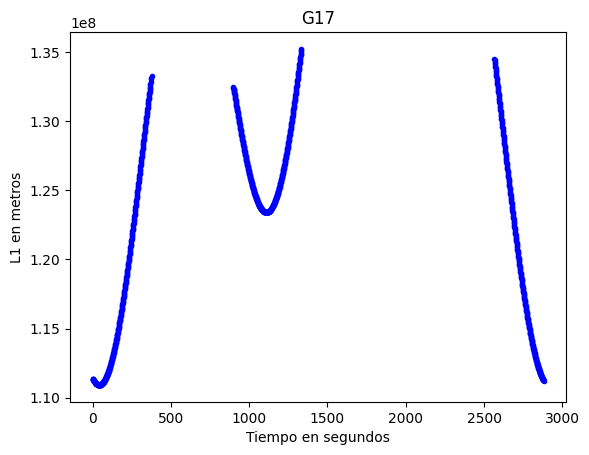

In [34]:
# En primer lugar vamos a obtener todas las gráfica sobre la señal de fase L1
import matplotlib.pyplot as plt 

def graficar_frec(filename : str, frec : int) -> None:
    sats = satelites(filename)
    
    for i in sats:
        datos = unafrecuencia(filename,frec, i)
        frecue = ['C1', 'P2', 'P5', 'L1' , 'L2' , 'L5' ]
        plt.title(i)
        plt.ylabel(f"{frecue[frec]} en unidades de ciclo")
        plt.xlabel("Tiempo en segundos")
        plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')

        plt.show()

def graficar_sat(filename : str , frec : int , sat : str) -> None:
    if frec == 0 :
        datos = C1(filename, sat)

    elif frec == 1 :
        datos = P2(filename, sat)

    elif frec == 3 : 
        datos = L1(filename, sat)

    elif frec == 4:
        datos = L2(filename, sat)
    
    frecue = ['C1', 'P2', 'P5', 'L1' , 'L2' , 'L5' ]

    plt.title(sat)
    plt.ylabel(f"{frecue[frec]} en metros")
    plt.xlabel("Tiempo en segundos")
    plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')
    plt.show()

#Ocupa mucho espacio por tanto no lo mostraremos aquí, pero si lo haremos para un satélite
#graficar_frec(filename, 3) #grafica todas las señales de fase L1 para cada satélite
graficar_sat(filename, 3, 'G17')


#Otra opción para realizar la graficación cuando tenemos los datos es la siguiente:
def graf_datos(datos: dict, titulo: str) -> None:
    plt.title(titulo)
    plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')
    plt.show()

Vamos a utilizar todo lo visto para realizar una combinación libre de geometría para el satélite `G01`

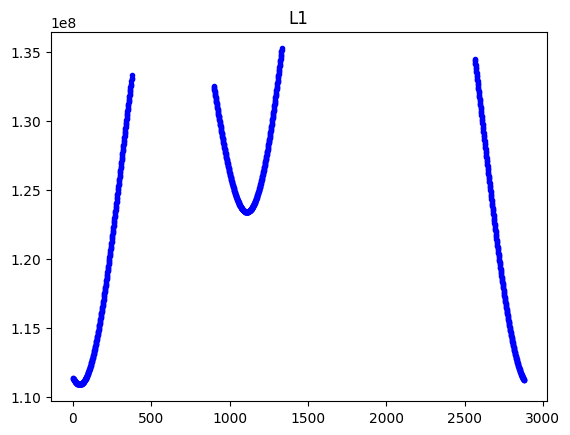

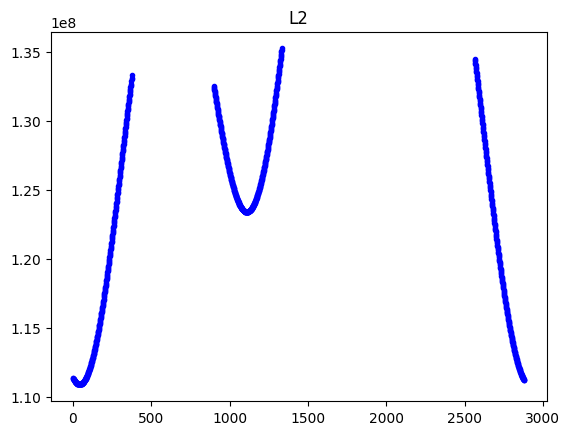

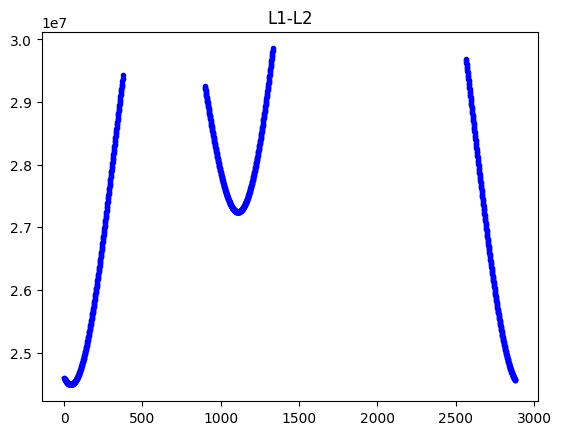

Graficación L1
 None Graficación L2
 None Graficación L1-L2
 None


In [35]:
# Primero obtenemos la información de un archivo RINEX
filename = "ejemplo.txt"
sat = 'G17'
D = all_information2(filename)

#Obtenemos la información del satélite G01 sobre L1 y L2
l1, l2 = L1(filename, sat), L2(filename, sat)
l1menosl2 = f1menosf2(l1,l2)

# Graficación de l1,l2 y l1 - l2
print("Graficación L1\n", graf_datos(l1,"L1"),
      "Graficación L2\n", graf_datos(l1,"L2"),
      "Graficación L1-L2\n", graf_datos(l1menosl2, "L1-L2")  )
